In [61]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from math import log

from list_dict import rename_th_expend,region_list,region_dict,rename_country_dict
from format_func import format_th_arrival,format_th_expend,format_th_stay_expend

## Reading data

In [62]:
# arrival number in thailand
th_arrival_2020 = pd.read_excel('data_source/2020_TH_no_of_arrival.xlsx',header=3)
th_arrival_2021 = pd.read_excel('data_source/2021_TH_no_of_arrival.xlsx',header=3)
th_arrival_2022 = pd.read_excel('data_source/2022_TH_no_of_arrival.xlsx',header=3)


# tourist expenditure thailand
th_expenditure_2018 = pd.read_excel('data_source/tourism_receipts_from_international_tourist_arrivals_by_expenditure_item_q_1_q_4_2018.xlsx'
,header=5,usecols='A:J')

th_expenditure_2019 = pd.read_excel('data_source/tourism_receipts_from_international_tourist_arrivals_by_expenditure_item_q_1_q_4_2019.xlsx'
,header=5,usecols='A:J')

# tourist expenditure v staying
th_stay_expend_2018 = pd.read_excel('data_source/tourism_receipts_from_international_tourist_arrivals_q_1_q_4_2018.xlsx'
,header=5,usecols='A:D,F')
th_stay_expend_2019 = pd.read_excel('data_source/tourism_receipts_from_international_tourist_arrivals_q_1_q_4_2019.xlsx'
,header=5,usecols='A:D,F')

## Transforming

In [63]:
# format
th_arrival_2020 = format_th_arrival(th_arrival_2020)
th_arrival_2021 = format_th_arrival(th_arrival_2021)
th_arrival_2022 = format_th_arrival(th_arrival_2022)


th_expenditure_2018 = format_th_expend(th_expenditure_2018)
th_expenditure_2019 = format_th_expend(th_expenditure_2019)

th_stay_expend_2018 = format_th_stay_expend(th_stay_expend_2018)
th_stay_expend_2019 = format_th_stay_expend(th_stay_expend_2019)

In [64]:
# get value vars
value_vars = th_expenditure_2018.columns.values.tolist()
value_vars.remove('Country')

# melt
# th_expenditure_2018_melt = pd.melt(th_expenditure_2018,id_vars='Country',value_vars=value_vars,var_name='Fields',value_name='2018')
# th_expenditure_2019_melt = pd.melt(th_expenditure_2019,id_vars='Country',value_vars=value_vars,var_name='Fields',value_name='2019')

# drop columns
th_arrival_2021.drop(columns=['2020P'],inplace=True)
th_arrival_2022.drop(columns=['2021P'],inplace=True)

In [65]:
# merge
th_arrival = pd.merge(th_arrival_2020,th_arrival_2021,how='inner',on='Nationality').merge(th_arrival_2022,how='inner',on='Nationality')
th_arrival = th_arrival[['Nationality', 2019,'2020P', '2021P', '2022P']]

th_arrival.rename(columns={2019:'2019','2020P':'2020','2021P':'2021','2022P':'2022'},inplace=True)

# th_expend = pd.merge(th_expenditure_2018_melt,th_expenditure_2019_melt,how='left',on=['Country','Fields'])
th_expend = pd.merge(th_expenditure_2018,th_expenditure_2019,how='left',on=['Country'])

# arrival per region
region_th_arrival = th_arrival.loc[th_arrival['Nationality'].isin(region_list)]

# expend per region
region_th_expend = th_expend.loc[th_expend['Country'].isin(region_list)]

# arrival per country
country_th_arrival = th_arrival.loc[~th_arrival['Nationality'].isin(region_list)]
country_th_expend = th_expend.loc[~th_expend['Country'].isin(region_list)]

# stay and spend per country
country_th_stay_spend_2018 = th_stay_expend_2018.loc[~th_stay_expend_2018['Country'].isin(region_list)]
country_th_stay_spend_2019 = th_stay_expend_2019.loc[~th_stay_expend_2018['Country'].isin(region_list)]

# stay and spend per region
region_th_stay_spend_2018 = th_stay_expend_2018.loc[th_stay_expend_2018['Country'].isin(region_list)]
region_th_stay_spend_2019 = th_stay_expend_2019.loc[th_stay_expend_2018['Country'].isin(region_list)]

In [66]:
# melt
region_th_arrival_melt = region_th_arrival.melt(id_vars='Nationality',value_vars=['2019','2020','2021','2022'],
                                                    value_name='num_arrival',var_name='year')

country_th_arrival_melt = country_th_arrival.melt(id_vars='Nationality',value_vars=['2019','2020','2021','2022'],
                                                    value_name='num_arrival',var_name='year')

In [67]:
# scale arrival from unit to million
region_th_arrival_melt['num_arrival'] = region_th_arrival_melt['num_arrival']/1000000
country_th_arrival_melt['num_arrival'] = country_th_arrival_melt['num_arrival']/1000000

#### Percent Change

In [68]:
country_th_arrival_melt.sort_values(by=['Nationality','year'],inplace=True)
region_th_arrival_melt.sort_values(by=['Nationality','year'],inplace=True)
country_th_arrival_melt['pct_change'] = country_th_arrival_melt.groupby('Nationality')['num_arrival'].pct_change()
region_th_arrival_melt['pct_change'] = region_th_arrival_melt.groupby('Nationality')['num_arrival'].pct_change()

#### Total Spending per Capita

In [69]:
region_th_stay_spend_2018['Spending per Capita (Bath/Stay)'] = region_th_stay_spend_2018['Spending per Capita (Baht/Day)'] * region_th_stay_spend_2018['Length of Stay (Days)']
region_th_stay_spend_2019['Spending per Capita (Bath/Stay)'] = region_th_stay_spend_2019['Spending per Capita (Baht/Day)'] * region_th_stay_spend_2019['Length of Stay (Days)']

country_th_stay_spend_2018['Spending per Capita (Bath/Stay)'] = country_th_stay_spend_2018['Spending per Capita (Baht/Day)'] * country_th_stay_spend_2018['Length of Stay (Days)']
country_th_stay_spend_2019['Spending per Capita (Bath/Stay)'] = country_th_stay_spend_2019['Spending per Capita (Baht/Day)'] * country_th_stay_spend_2019['Length of Stay (Days)']

/var/folders/64/b9lft99n3z7f93x2yz_nmxzr0000gn/T/ipykernel_12129/401202287.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  region_th_stay_spend_2018['Spending per Capita (Bath/Stay)'] = region_th_stay_spend_2018['Spending per Capita (Baht/Day)'] * region_th_stay_spend_2018['Length of Stay (Days)']
/var/folders/64/b9lft99n3z7f93x2yz_nmxzr0000gn/T/ipykernel_12129/401202287.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  region_th_stay_spend_2019['Spending per Capita (Bath/Stay)'] = region_th_stay_spen

## Visualization

In [70]:
display(region_th_arrival_melt.sort_values(['num_arrival'],ascending=False).head(5))
display(country_th_arrival_melt.sort_values(['num_arrival'],ascending=False).head(5))

,Nationality,year,num_arrival,pct_change
0,East Asia,2019,27.391050,NaN
1,Asean,2019,10.751957,NaN
2,Europe,2019,6.711816,NaN
27,East Asia,2022,5.900461,79.357098
28,Asean,2022,4.526645,136.923370


,Nationality,year,num_arrival,pct_change
9,China,2019,10.997169,NaN
4,Malaysia,2019,4.272584,NaN
33,India,2019,1.995363,NaN
139,Malaysia,2022,1.948549,352.574487
12,Korea,2019,1.890959,NaN


In [71]:
display(country_th_stay_spend_2018.sort_values('Spending per Capita (Bath/Stay)',ascending=False).head(5))
display(country_th_stay_spend_2019.sort_values('Spending per Capita (Bath/Stay)',ascending=False).head(5))

,Country,No. of Arrivals,Length of Stay (Days),Spending per Capita (Baht/Day),Total Spend (Mil. Baht),Spending per Capita (Bath/Stay)
54,Kuwait,77365.0,13.14,7254.92,7375.19,95329.6488
55,Saudi Arabia,35090.0,12.55,7406.64,3261.73,92953.3320
53,Israel,185366.0,17.35,5218.09,16781.90,90533.8615
20,Denmark,170044.0,16.70,5360.26,15221.72,89516.3420
29,Sweden,304206.0,19.13,4640.02,27002.46,88763.5826


,Country,No. of Arrivals,Length of Stay (Days),Spending per Capita (Baht/Day),Total Spend (Mil. Baht),Spending per Capita (Bath/Stay)
26,Norway,130509.0,17.40,5271.56,11970.93,91725.1440
54,Kuwait,84504.0,13.05,6960.06,7675.40,90828.7830
55,Saudi Arabia,36783.0,12.83,6823.42,3220.15,87544.4786
20,Denmark,159526.0,17.04,5070.83,13784.14,86406.9432
29,Sweden,279451.0,19.15,4442.05,23771.56,85065.2575


In [72]:
display(region_th_stay_spend_2018.sort_values('Spending per Capita (Bath/Stay)',ascending=False).head(5))
display(region_th_stay_spend_2019.sort_values('Spending per Capita (Bath/Stay)',ascending=False).head(5))

,Country,No. of Arrivals,Length of Stay (Days),Spending per Capita (Baht/Day),Total Spend (Mil. Baht),Spending per Capita (Bath/Stay)
51,Middle East,767796.0,12.89,6243.92,61795.44,80484.1288
47,Oceania,911038.0,13.38,5538.50,67512.64,74105.1300
34,The Americas,1534008.0,14.86,4880.21,111246.21,72519.9206
58,Africa,200328.0,12.70,5686.13,14466.45,72213.8510
17,Europe,6603695.0,16.85,4179.71,465086.23,70428.1135


,Country,No. of Arrivals,Length of Stay (Days),Spending per Capita (Baht/Day),Total Spend (Mil. Baht),Spending per Capita (Bath/Stay)
51,Middle East,727318.0,12.90,6115.83,57381.19,78894.2070
47,Oceania,874154.0,13.19,5368.45,61898.66,70809.8555
17,Europe,6531220.0,16.82,4084.87,448743.81,68707.5134
58,Africa,196819.0,12.22,5531.79,13304.65,67598.4738
34,The Americas,1559800.0,14.46,4659.25,105087.99,67372.7550


##### Number of Arrival by Region

Text(0, 0.5, 'Year')

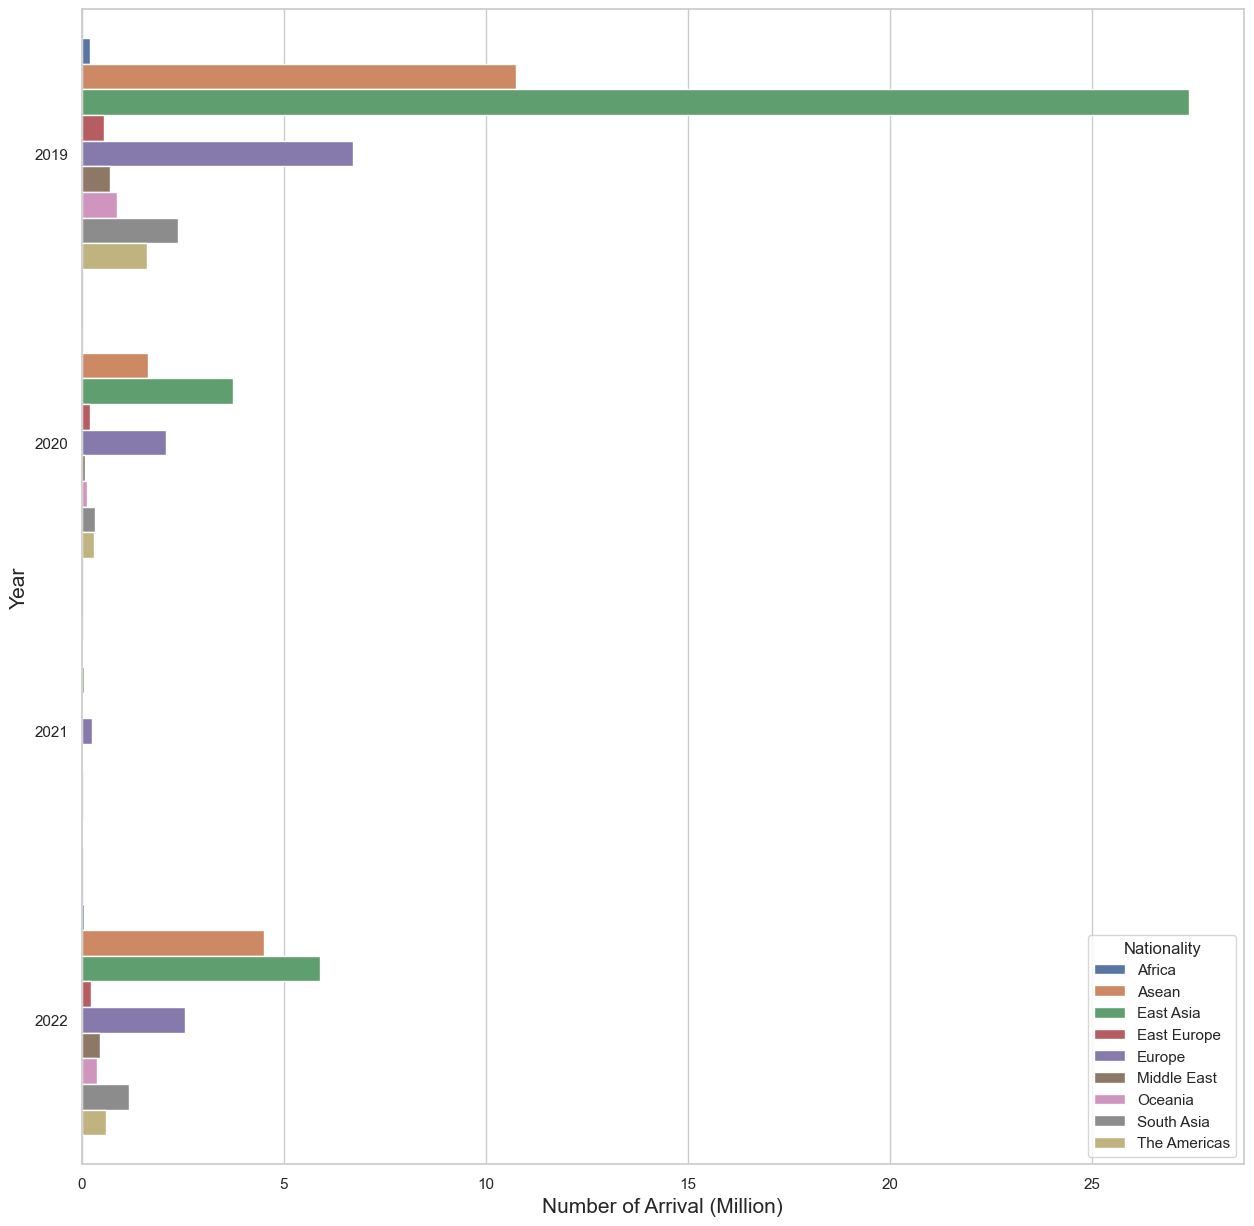

In [86]:
fig, axes = plt.subplots( figsize=(15, 15))
axes.ticklabel_format(axis='x', style='plain')

sns.barplot(region_th_arrival_melt,x='num_arrival',y='year',hue='Nationality')
axes.set_xlabel('Number of Arrival (Million)',fontdict={'size':15})
axes.set_ylabel('Year',fontdict={'size':15})

<AxesSubplot: xlabel='year', ylabel='num_arrival'>

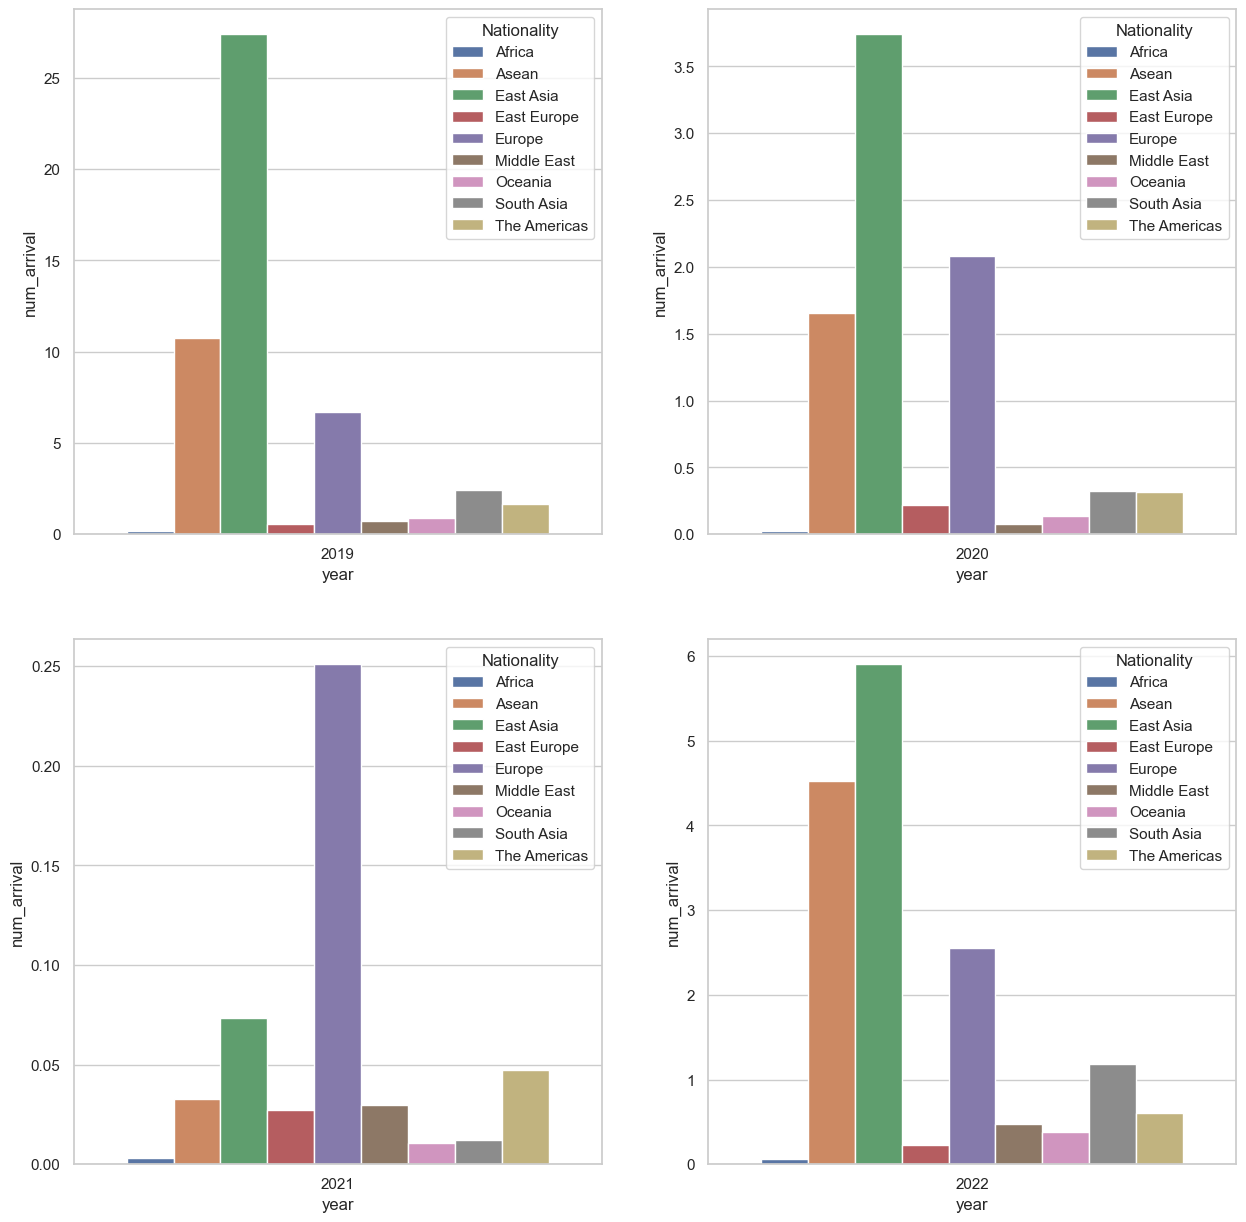

In [87]:
fig, axes = plt.subplots(2, 2, figsize=(15, 15))
# axes.ticklabel_format(axis='y', style='plain')

sns.barplot(region_th_arrival_melt.loc[region_th_arrival_melt['year'].isin(['2019'])],x='year',y='num_arrival',hue='Nationality',ax=axes[0,0])
sns.barplot(region_th_arrival_melt.loc[region_th_arrival_melt['year'].isin(['2020'])],x='year',y='num_arrival',hue='Nationality',ax=axes[0,1])
sns.barplot(region_th_arrival_melt.loc[region_th_arrival_melt['year'].isin(['2021'])],x='year',y='num_arrival',hue='Nationality',ax=axes[1,0])
sns.barplot(region_th_arrival_melt.loc[region_th_arrival_melt['year'].isin(['2022'])],x='year',y='num_arrival',hue='Nationality',ax=axes[1,1])

#### Number of Arrival from Asia

Text(0, 0.5, 'Year')

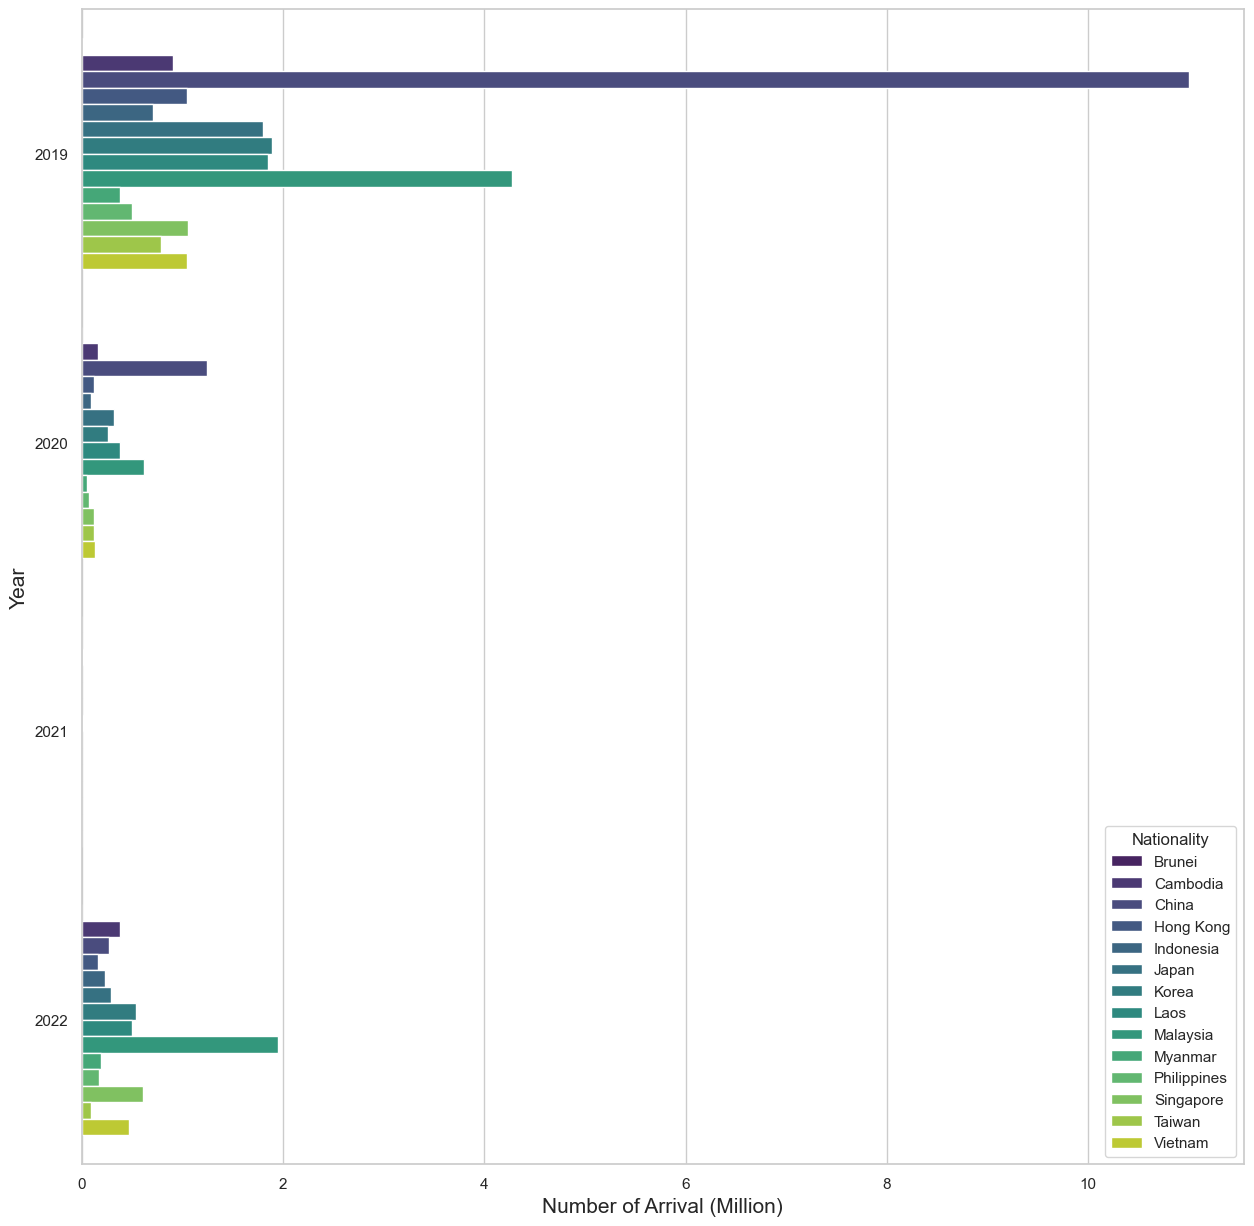

In [88]:
fig, axes = plt.subplots( figsize=(15, 15))
axes.ticklabel_format(axis='x', style='plain')
sns.set_theme(style="whitegrid")

axes = sns.barplot(country_th_arrival_melt.loc[country_th_arrival_melt['Nationality'].isin(region_dict['East Asia'])],
            x='num_arrival',y='year',hue='Nationality',palette='viridis')
axes.set_xlabel('Number of Arrival (Million)',fontdict={'size':15})
axes.set_ylabel('Year',fontdict={'size':15})

[Text(0.5, 0, '2022 Change (%)')]

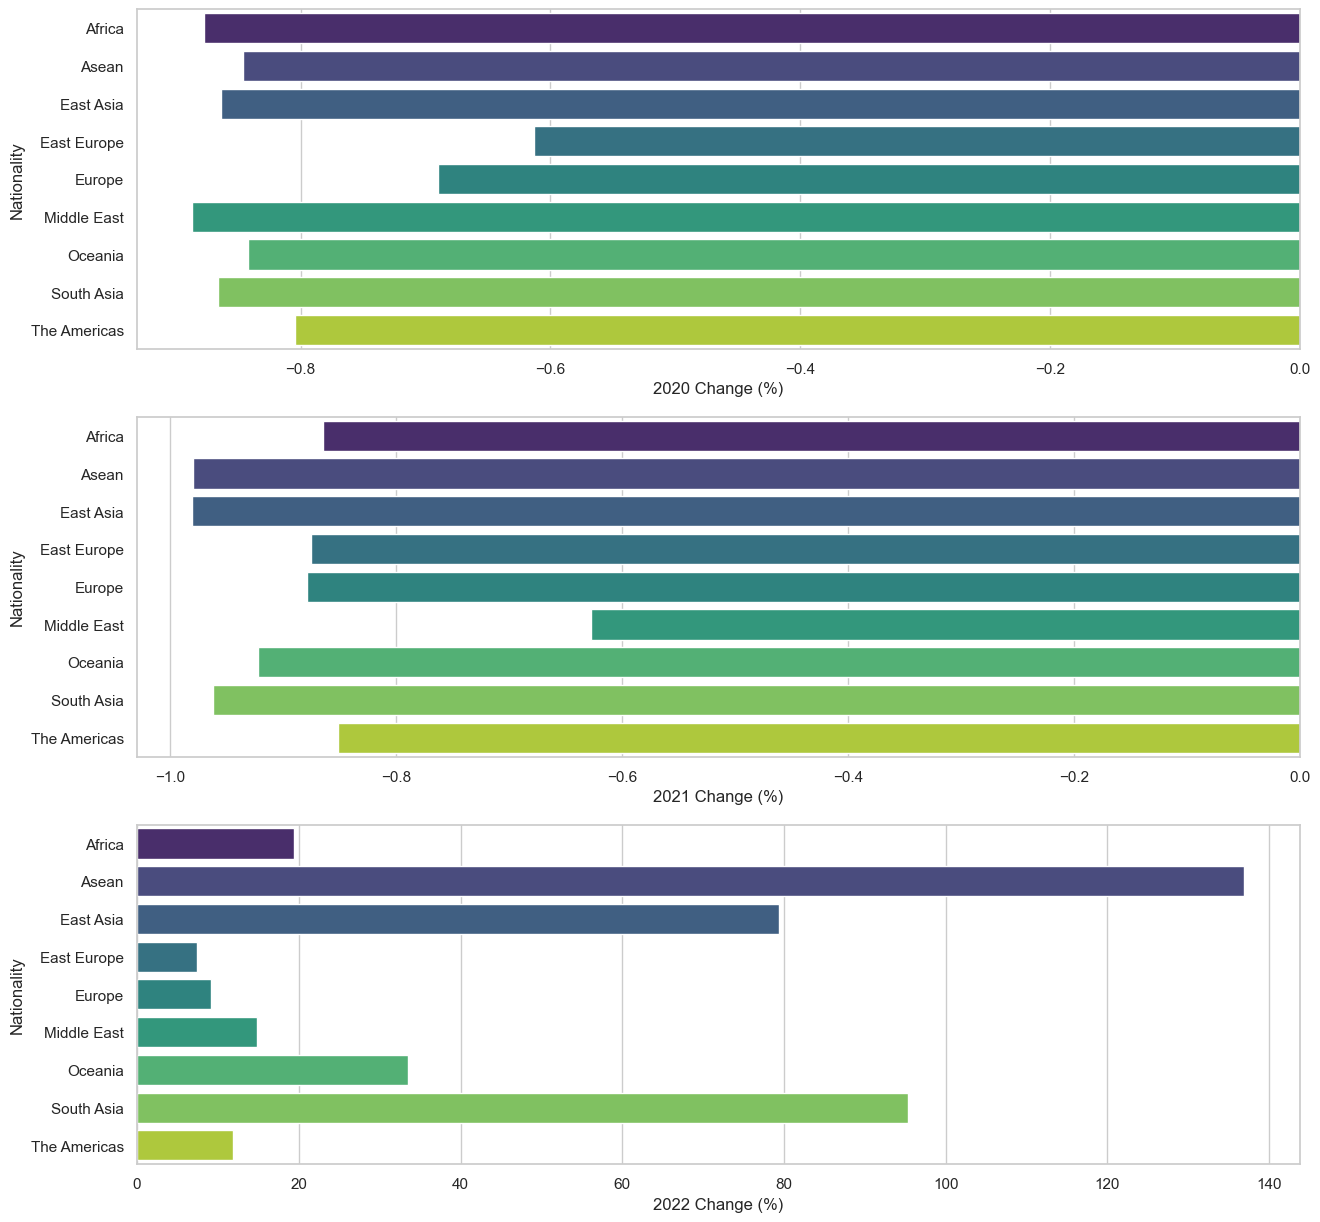

In [89]:
fig,(ax1,ax2,ax3) = plt.subplots(3, figsize=(15, 15))
# axes.ticklabel_format(axis='x', style='plain')
sns.set_theme(style="whitegrid")

sns.barplot(region_th_arrival_melt.loc[(region_th_arrival_melt['Nationality'].isin(region_list)) & (region_th_arrival_melt['year'].isin(['2020']))],
            x='pct_change',y='Nationality',ax=ax1,palette='viridis').set(xlabel='2020 Change (%)')
sns.barplot(region_th_arrival_melt.loc[(region_th_arrival_melt['Nationality'].isin(region_list)) & (region_th_arrival_melt['year'].isin(['2021']))],
            x='pct_change',y='Nationality',ax=ax2,palette='viridis').set(xlabel='2021 Change (%)')
sns.barplot(region_th_arrival_melt.loc[(region_th_arrival_melt['Nationality'].isin(region_list)) & (region_th_arrival_melt['year'].isin(['2022']))],
            x='pct_change',y='Nationality',ax=ax3,palette='viridis').set(xlabel='2022 Change (%)')

# plot pie chart for expend